In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1269.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1385.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1383.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1354.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1339.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1380.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1304.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1340.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1211.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1355.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1222.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.models import Sequential

In [3]:
def load_images(impath):
    imgs = []
    label = []
    l1 = os.listdir(impath)
    for i in l1:
        l2 = os.listdir(impath+'/'+i)
        for j in l2:
            img = Image.open(impath+i+'/'+j).convert('RGB')
            img = img.resize(size=(100,100))
            imgs.append(np.array(img))
            label.append(i)
            del img
    %matplotlib inline
    plt.figure(figsize=(20,20))
    for i in range(30):
        plt.subplot(6,5,i+1)
        plt.title(label[i])
        plt.imshow(imgs[i])
        plt.axis('off')
    plt.show()
    return np.array(imgs),label

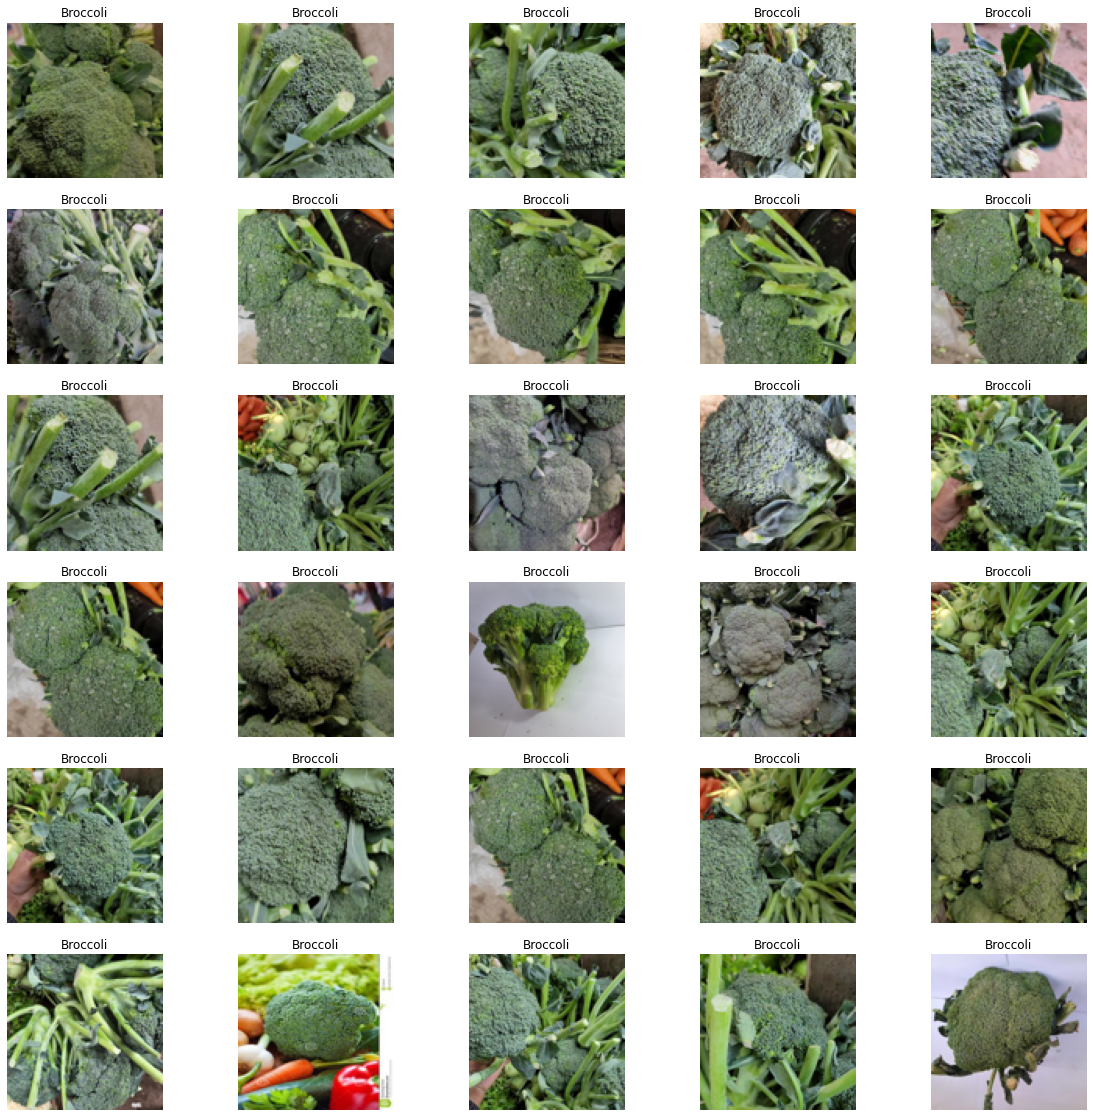

In [4]:
x_train,y_train = load_images("../input/vegetable-image-dataset/Vegetable Images/train/")

In [5]:
x_train.shape

(15000, 100, 100, 3)

In [6]:
len(y_train)

15000

In [7]:
y_train[14980:]

['Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato',
 'Potato']

In [8]:
target = pd.Series(y_train,dtype='category')

In [9]:
target.value_counts()


Bean            1000
Bitter_Gourd    1000
Bottle_Gourd    1000
Brinjal         1000
Broccoli        1000
Cabbage         1000
Capsicum        1000
Carrot          1000
Cauliflower     1000
Cucumber        1000
Papaya          1000
Potato          1000
Pumpkin         1000
Radish          1000
Tomato          1000
dtype: int64

In [10]:
t = target.cat.codes

In [11]:
t

0         4
1         4
2         4
3         4
4         4
         ..
14995    11
14996    11
14997    11
14998    11
14999    11
Length: 15000, dtype: int8

In [12]:
x_test,y_test = load_images("../input/vegetable-image-dataset/Vegetable Images/test/")

In [13]:
target1 = pd.Series(y_test,dtype='category')

In [14]:
t1 = target1.cat.codes

In [15]:
t1

0        4
1        4
2        4
3        4
4        4
        ..
2995    11
2996    11
2997    11
2998    11
2999    11
Length: 3000, dtype: int8

In [16]:
from tensorflow.keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(32,activation='relu',kernel_size=3,input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,activation='relu',kernel_size=3))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,activation='relu',kernel_size=3))

2022-11-18 05:51:19.063748: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(500,activation='relu'))
model.add(Dense(15,activation='softmax'))

In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.fit(x_train,t,epochs=5)

2022-11-18 05:51:20.193700: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
469/469 [==============================] - 110s 234ms/step - loss: 9.7043 - accuracy: 0.2011
Epoch 2/5
469/469 [==============================] - 109s 233ms/step - loss: 1.9555 - accuracy: 0.3823
Epoch 3/5
469/469 [==============================] - 111s 236ms/step - loss: 1.3259 - accuracy: 0.5824
Epoch 4/5
469/469 [==============================] - 110s 236ms/step - loss: 0.7975 - accuracy: 0.7459
Epoch 5/5
469/469 [==============================] - 110s 234ms/step - loss: 0.4952 - accuracy: 0.8445


In [21]:
def load_images_valid(impath):
    imgs = []
    label = []
    l1 = os.listdir(impath)
    for i in l1:
        l2 = os.listdir(impath+'/'+i)
        for j in l2:
            img = Image.open(impath+i+'/'+j).convert('RGB')
            img = img.resize(size=(100,100))
            imgs.append(np.array(img))
            label.append(i)
            del img
    return np.array(imgs),label

In [22]:
x_val,y_val = load_images_valid("../input/vegetable-image-dataset/Vegetable Images/validation/")

In [23]:
x_val.shape

(3000, 100, 100, 3)

In [24]:
len(y_val)

3000

In [25]:
_,acc = model.evaluate(x_train,t)

469/469 [==============================] - 30s 63ms/step - loss: 0.2733 - accuracy: 0.9193


In [26]:
acc

0.9192666411399841

In [27]:
_,acc = model.evaluate(x_test,t1)

94/94 [==============================] - 6s 62ms/step - loss: 1.6902 - accuracy: 0.6440


In [28]:
acc

0.6439999938011169

In [29]:
target2 = pd.Series(y_val,dtype='category')

In [30]:
t2 = target2.cat.codes

In [31]:
t2

0        4
1        4
2        4
3        4
4        4
        ..
2995    11
2996    11
2997    11
2998    11
2999    11
Length: 3000, dtype: int8

In [32]:
_,acc = model.evaluate(x_val,t2)

94/94 [==============================] - 6s 63ms/step - loss: 1.6924 - accuracy: 0.6537


In [33]:
acc

0.6536666750907898